**Exploratory data analysis**

In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cache = yaml.safe_load(open('data.yaml', 'r'))

In [9]:
popularity_dict = {ep: cache[ep]['stats'] for ep in cache if cache[ep]['year'] == 2022}
len(popularity_dict)

104

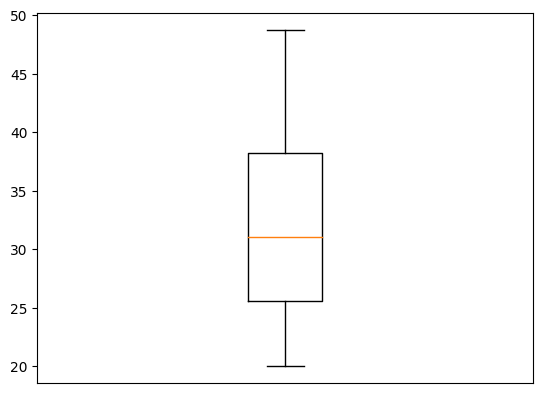

In [10]:
B = plt.boxplot(popularity_dict.values())
plt.tick_params(axis='x', bottom=False, labelbottom=False)

In [11]:
[item.get_ydata() for item in B['whiskers']]

[array([25.575, 20.   ]), array([38.225, 48.7  ])]

**Differentiate between positives and negatives**

In [12]:
positive = {(ep, cache[ep]['dow'], cache[ep]['duration']) for ep in popularity_dict if popularity_dict[ep] >= 38.225}
len(positive)

26

In [13]:
negative = {(ep, cache[ep]['dow'], cache[ep]['duration']) for ep in popularity_dict if popularity_dict[ep] < 38.225}
len(negative)

78

**Comparing durations of positive and negative classes**

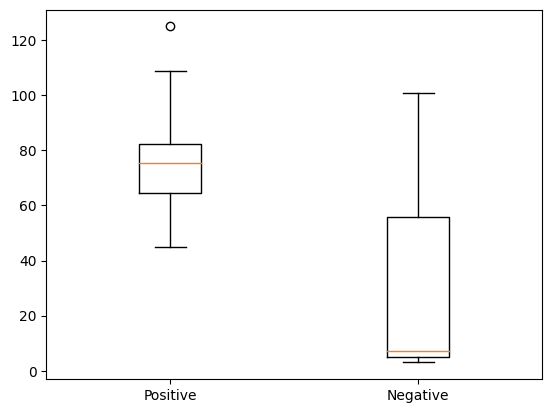

In [15]:
_ = plt.boxplot([
    [ep[2] for ep in positive],
    [ep[2] for ep in negative]
], labels=['Positive', 'Negative'], widths=0.25)

In [17]:
pd.Series([el[1] for el in positive]).value_counts()

Tuesday     24
Thursday     1
Monday       1
Name: count, dtype: int64

In [18]:
pd.Series([el[1] for el in negative]).value_counts()

Thursday     35
Tuesday      29
Friday       10
Wednesday     3
Monday        1
Name: count, dtype: int64

## Tuesday / Friday

In [81]:
[ep for ep in positive if cache[ep]['dow'] == 'Friday']

[]

In [83]:
[ep for ep in positive if cache[ep]['dow'] == 'Thursday']

[583]

In [72]:
[ep for ep in positive if cache[ep]['dow'] == 'Wednesday']

[]

In [74]:
[ep for ep in positive if cache[ep]['dow'] == 'Monday']

[541]

In [79]:
len([ep for ep in positive if cache[ep]['dow'] == 'Tuesday'])

24

In [75]:
popularity_dict = {ep: cache[ep]['stats'] for ep in cache if cache[ep]['year'] == 2022 and cache[ep]['dow'] not in ('Friday', 'Wednesday')}
len(popularity_dict)

91

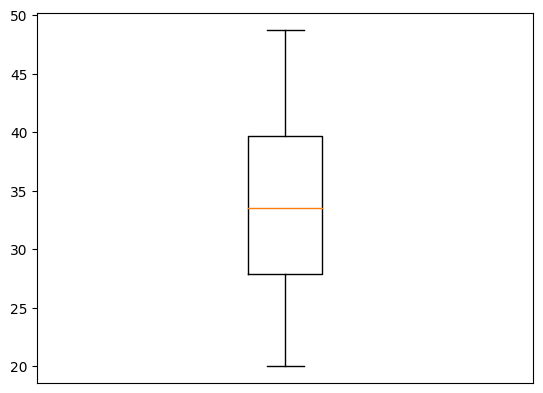

In [76]:
B = plt.boxplot(popularity_dict.values())
plt.tick_params(axis='x', bottom=False, labelbottom=False)

In [77]:
[item.get_ydata() for item in B['whiskers']]

[array([27.9, 20. ]), array([39.7, 48.7])]

In [13]:
positive = [ep for ep in popularity_dict if popularity_dict[ep] >= 42]
len(positive)

14

In [14]:
negative = [ep for ep in popularity_dict if popularity_dict[ep] < 42]
len(negative)

39

## Duration

# Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = positive + negative
len(X)

53

In [20]:
import subprocess

In [24]:
episode = 625

In [25]:
cache[episode]['link']

'https://www.youtube.com/embed/9dCxDwypfmw'

In [156]:
y = [1] * len(positive) + [0] * len(negative)
len(y)

53

In [157]:
train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

[[543,
  547,
  601,
  631,
  551,
  605,
  603,
  563,
  553,
  585,
  567,
  625,
  581,
  545,
  591,
  555,
  635,
  550,
  639,
  580,
  589,
  575,
  607,
  617,
  619,
  571,
  611,
  627,
  637,
  557,
  577,
  573,
  559,
  599,
  615,
  579,
  595],
 [597,
  565,
  569,
  539,
  621,
  537,
  587,
  561,
  606,
  629,
  549,
  623,
  633,
  613,
  593,
  609],
 [1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]